Import used Libraries

In [38]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os 


Applying PCA

Loaded scaled_data shape: (297, 20)
Loaded y shape: (297, 1)
Number of components that explain 95.0% variance: 14


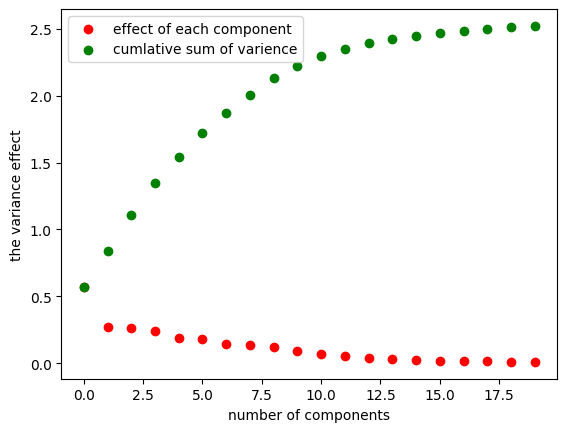

shape of PCA with optimal components : (297, 14)
first 5 rows to PCA with optimal components: 
          0         1         2         3         4         5         6   \
0 -0.426024 -0.130280 -0.117063  1.001039 -0.374915 -0.076326 -0.621373   
1  0.939765 -0.467977  0.344707  0.220276  0.107030 -0.078213 -0.624775   
2  1.381442 -0.089963  0.160823  0.180053 -0.223884 -0.449727  0.000200   
3 -0.961976  0.564958 -0.190456 -0.035429 -0.505612  0.112553 -0.469931   
4 -0.894109 -0.807236 -0.223686  0.434275  0.373116 -0.121404  0.500189   

         7         8         9         10        11        12        13  
0  0.376699  0.595862 -0.570356  0.810244 -0.467132  0.416813  0.125791  
1 -0.009729 -0.366241 -0.485316 -0.003210  0.795918 -0.294436  0.184216  
2  0.266722 -0.131433  0.686504  0.075911  0.131400 -0.103206 -0.043799  
3 -0.182398 -0.285597 -0.083781  0.735359 -0.392150 -0.384128 -0.280706  
4  0.285398 -0.303738 -0.059888  0.000979 -0.061799  0.081828 -0.195611  

Processe

In [39]:
#retrive data 
input_data_path = '../data_through_notes/' # Relative path to data folder from notebooks folder
scaled_data = pd.read_csv(os.path.join(input_data_path, 'scaled_data.csv'))
y = pd.read_csv(os.path.join(input_data_path, 'y_processed.csv'))

print("Loaded scaled_data shape:", scaled_data.shape)
print("Loaded y shape:", y.shape)
#scaled_data

#determine number of principal components
pca=PCA()
pca.fit(scaled_data)
scaled_data_pca=pca.transform(scaled_data)

cumsum=np.cumsum(pca.explained_variance_ratio_)

threshold = 0.95 # For 95% explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Number of components that explain {threshold*100}% variance: {n_components}")

#scatter plot for each varicance
plt.scatter(x=range(0,len(pca.explained_variance_)),y=(pca.explained_variance_),c='red',label='effect of each component')
plt.scatter(x=range(0,len(pca.explained_variance_)),y=np.cumsum(pca.explained_variance_),c='green',label='cumlative sum of varience')
plt.xlabel("number of components")
plt.ylabel('the variance effect')
plt.legend()
plt.show()

#putting optimal number of principal components
pca_optimal=PCA(n_components=14)
pca_optimal.fit(scaled_data)
scaled_data_pca=pca_optimal.transform(scaled_data)
scaled_data_pca_df=pd.DataFrame(scaled_data_pca)
#%store scaled_data_pca_df

print(f'shape of PCA with optimal components : {scaled_data_pca_df.shape}')
print(f'first 5 rows to PCA with optimal components: \n {scaled_data_pca_df.head()}')
#loading data 
output_data_path = '../data_through_notes/' # Relative path to data folder from notebooks folder
os.makedirs(output_data_path, exist_ok=True)

scaled_data_pca_df.to_csv(os.path.join(output_data_path, 'scaled_data_pca_df.csv'), index=False)

print(f"\nProcessed X saved to: {os.path.join(output_data_path, 'scaled_data.csv')}")